<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.2
# *The Perceptron*

The perceptron is the basic unit of a neural network. It learns by adjusting the weights applied to each of its inputs until the error at its output is minimised.

The example in this lab uses the stochastic gradient descent (SGD) algorithm to optimise the weights of a perceptron applied to a 2D classification problem.

In [102]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

The training dataset has 2 numeric features (X is 2D) and a binary response (y = +/-1):

In [103]:
X = np.array([[-1, 3], [1, 4], [4, 5], [-1, 5], [2, 6], [5, 6]])
y = np.array([-1, -1, -1, 1, 1, 1])

Here is the training data, along with a candidate hyperplane that separates the classes:

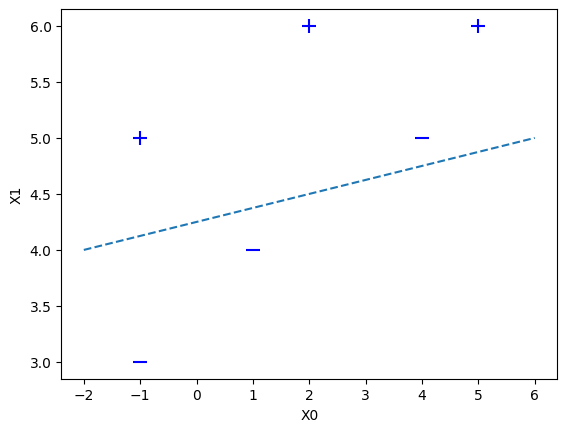

In [104]:
def plotData(X):
    for d, sample in enumerate(X):
        # Plot the negative samples
        if d < 3:
            plt.scatter(sample[0], sample[1], s = 100, marker = '_', color = 'blue')
        # Plot the positive samples
        else:
            plt.scatter(sample[0], sample[1], s = 100, marker = '+', color = 'blue')
    plt.xlabel('X0')
    plt.ylabel('X1')

plotData(X)

# Print one possible hyperplane that separates the two classes:
plt.plot([-2, 6], [4, 5], linestyle = 'dashed');

We need to include a bias term (-1) in the X array. This will transform the decision boundary so that the sign of the dot product of any data point with the weights vector, represented in the code below by $$⟨x[i], w⟩ = {\rm wt}[0]\times x_0 + {\rm wt}[1]\times x_1 + {\rm wt}[2]\times(-1),$$  will determine class membership:

In [105]:
X = np.array([ [-1, 3, -1], [1, 4, -1], [4, 5, -1], [-1, 5, -1], [2, 6, -1], [5, 6, -1]])

Here is a simple implementation of the stochastic gradient descent algorithm for computing the weights:

In [106]:
def calc_perceptron_weights(Xt, Yt, eta = 1, epochs = 20):

    # Initialize the weight vector for the perceptron with zeros:
    wt = np.zeros(len(Xt[0]))

    for t in range(epochs):

        # Iterate over each sample in the data set:
        for i, x in enumerate(Xt):

            # Test for misclassification: y * ⟨x[i], w⟩ <= 0:
            if (np.dot(Xt[i], wt) * Yt[i]) <= 0:

                # Update weights:
                wt = wt + eta * Xt[i] * Yt[i]

    return wt

Compute the weights using default learning rate (eta = 1) and number of epochs = 10:

In [107]:
w = calc_perceptron_weights(X, y, epochs = 10)
print(w)

[2. 9. 4.]


Did it work? Let's check the decision boundary (hyperplane) and try some predictions:

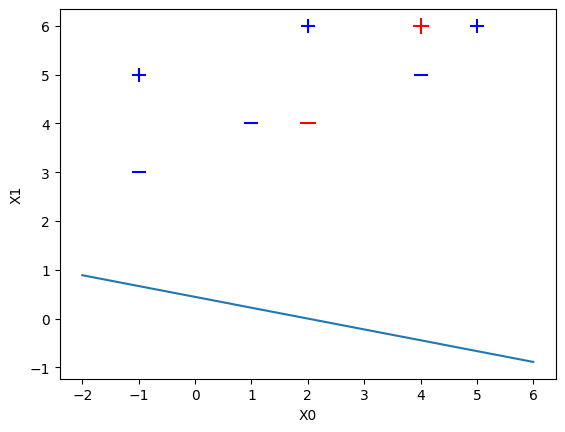

In [108]:
def plotHyperplane(wt):

    xx = np.linspace(-2,6)
    yy = (-wt[0]*xx + wt[2])/wt[1]
    plt.plot(xx, yy);

plotData(X)
plotHyperplane(w)

# Test samples:
plt.scatter(2, 4, s = 120, marker = '_', color = 'red')
plt.scatter(4, 6, s = 120, marker = '+', color = 'red')

So far, all of the negatively labelled points are misclassified!

Let's a look at how the model training actually proceeds. The error at each epoch is calculated using a hinge-loss function:

[2. 9. 4.]


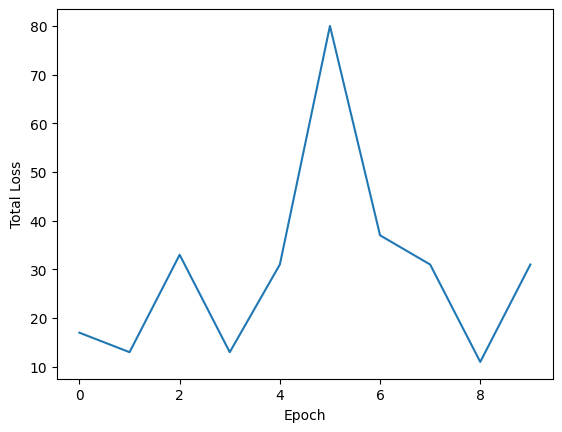

In [109]:
def perceptron_plot(Xt, Yt, eta = 1, epochs = 10):

    wt = np.zeros(len(Xt[0]))
    errors = []

    for t in range(epochs):
        error = 0
        for i, x in enumerate(Xt):
            if (np.dot(Xt[i], wt) * Yt[i]) <= 0:
                error += -(np.dot(Xt[i], wt) * Yt[i])
                wt += eta * Xt[i] * Yt[i]
        errors.append(error)

    plt.plot(errors);
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return wt

print(perceptron_plot(X, y))

So, 10 epochs clearly wasn't enough for the SGD algorithm to converge.

Try increasing `epochs` until the error goes to zero, then replot the test data and decision boundary:

[-1.  5. 23.]


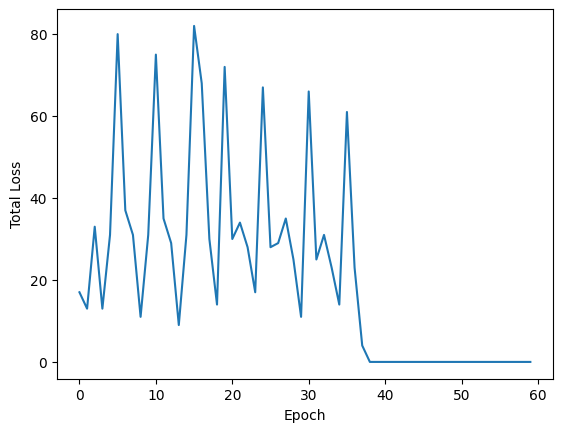

In [110]:
# increasing epochs to 60
def perceptron_plot(Xt, Yt, eta = 1, epochs = 60):

    wt = np.zeros(len(Xt[0]))
    errors = []

    for t in range(epochs):
        error = 0
        for i, x in enumerate(Xt):
            if (np.dot(Xt[i], wt) * Yt[i]) <= 0:
                error += -(np.dot(Xt[i], wt) * Yt[i])
                wt += eta * Xt[i] * Yt[i]
        errors.append(error)

    plt.plot(errors);
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return wt

print(perceptron_plot(X, y))

In [111]:
w = calc_perceptron_weights(X, y, epochs = 100)
print(w)

[-1.  5. 23.]


In [112]:
#weight is
w

array([-1.,  5., 23.])

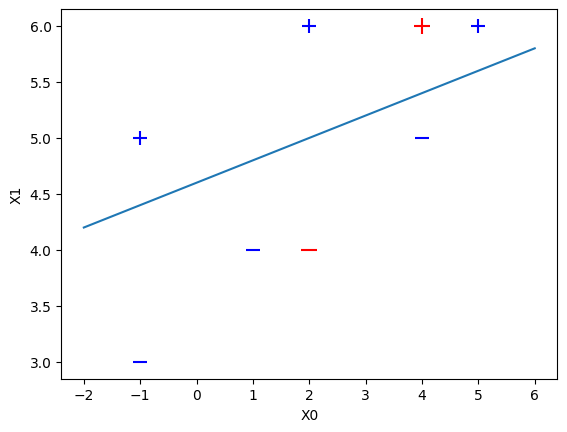

In [113]:
def plotHyperplane(wt):

    xx = np.linspace(-2,6)
    yy = (-wt[0]*xx + wt[2])/wt[1]
    plt.plot(xx, yy);

plotData(X)
plotHyperplane(w)

# Test samples:
plt.scatter(2, 4, s = 120, marker = '_', color = 'red')
plt.scatter(4, 6, s = 120, marker = '+', color = 'red')

Show how to manually compute class membership for a new data point Xi = [3.5, 3.3] using just the weights determined above:

In [114]:
# Given weights and new data point
weights = [-1, 5, 23]
x_i = [3.5, 3.3]

# Compute the decision value
decision_value = weights[0] + weights[1] * x_i[0] + weights[2] * x_i[1]
# decision_value = -1 + 5*3.5 + 23*3.3
# decision_value = -1 + 17.5 + 75.9
# decision_value = 92.4

print("Decision Value:", decision_value)

# Determine the class
if decision_value > 0:
    print("Class: -")
else:
    print("Class: +")

Decision Value: 92.39999999999999
Class: -


In [115]:
np.dot(w , [3.5, 3.3, -1])

-10.0

In a similar manner make sure each of the training data points is correctly classified:

In [116]:
# Check for misclassified data points

train_predictions = predict(X, w)


misclassified_indices = np.where(train_predictions != y)[0]
if len(misclassified_indices) > 0:
    print("Misclassified training data points:")
    for index in misclassified_indices:
        print(f"Index: {index}, True label: {y[index]}, Predicted label: {train_predictions[index]}")
else:
    print("All training data points are correctly classified.")


All training data points are correctly classified.


# === End ===



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



